# Table of Contents
 <p><div class="lev1 toc-item"><a data-toc-modified-id="Manual-implementation-of-the-Mersenne-twister-PseudoRandom-Number-Generator-(PRNG)-1" href="#Manual-implementation-of-the-Mersenne-twister-PseudoRandom-Number-Generator-(PRNG)"><span class="toc-item-num">1&nbsp;&nbsp;</span>Manual implementation of the Mersenne twister PseudoRandom Number Generator (PRNG)</a></div><div class="lev2 toc-item"><a data-toc-modified-id="Common-API-for-the-PRNG-defined-here-11" href="#Common-API-for-the-PRNG-defined-here"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Common API for the PRNG defined here</a></div><div class="lev2 toc-item"><a data-toc-modified-id="First-example:-a-simple-linear-congruential-generator-12" href="#First-example:-a-simple-linear-congruential-generator"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>First example: a simple linear congruential generator</a></div><div class="lev2 toc-item"><a data-toc-modified-id="Checking-and-plotting-the-result?-13" href="#Checking-and-plotting-the-result?"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Checking and plotting the result?</a></div><div class="lev2 toc-item"><a data-toc-modified-id="A-second-example:-Multiple-Recursive-Generator-14" href="#A-second-example:-Multiple-Recursive-Generator"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>A second example: Multiple-Recursive Generator</a></div><div class="lev2 toc-item"><a data-toc-modified-id="A-third-example:-combined-Multiple-Recursive-Generator,-with-MRG32k3a-15" href="#A-third-example:-combined-Multiple-Recursive-Generator,-with-MRG32k3a"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>A third example: combined Multiple-Recursive Generator, with <code>MRG32k3a</code></a></div><div class="lev2 toc-item"><a data-toc-modified-id="Finally,-the-Mersenne-twister-PRNG-16" href="#Finally,-the-Mersenne-twister-PRNG"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Finally, the Mersenne twister PRNG</a></div><div class="lev3 toc-item"><a data-toc-modified-id="Period-161" href="#Period"><span class="toc-item-num">1.6.1&nbsp;&nbsp;</span>Period</a></div><div class="lev3 toc-item"><a data-toc-modified-id="Random-seeds-162" href="#Random-seeds"><span class="toc-item-num">1.6.2&nbsp;&nbsp;</span>Random seeds</a></div><div class="lev3 toc-item"><a data-toc-modified-id="Implementing-the-Mersenne-twister-algorithm-163" href="#Implementing-the-Mersenne-twister-algorithm"><span class="toc-item-num">1.6.3&nbsp;&nbsp;</span>Implementing the Mersenne twister algorithm</a></div><div class="lev3 toc-item"><a data-toc-modified-id="Small-review-of-bitwise-operations-164" href="#Small-review-of-bitwise-operations"><span class="toc-item-num">1.6.4&nbsp;&nbsp;</span>Small review of bitwise operations</a></div><div class="lev3 toc-item"><a data-toc-modified-id="Testing-our-implementation-165" href="#Testing-our-implementation"><span class="toc-item-num">1.6.5&nbsp;&nbsp;</span>Testing our implementation</a></div><div class="lev2 toc-item"><a data-toc-modified-id="Conclusion-17" href="#Conclusion"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Conclusion</a></div><div class="lev1 toc-item"><a data-toc-modified-id="Generating-samples-from-other-distributions-2" href="#Generating-samples-from-other-distributions"><span class="toc-item-num">2&nbsp;&nbsp;</span>Generating samples from other distributions</a></div><div class="lev2 toc-item"><a data-toc-modified-id="Bernoulli-distribution-21" href="#Bernoulli-distribution"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Bernoulli distribution</a></div><div class="lev2 toc-item"><a data-toc-modified-id="Exponential-distribution-22" href="#Exponential-distribution"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Exponential distribution</a></div><div class="lev2 toc-item"><a data-toc-modified-id="Gaussian-distribution-(normal)-23" href="#Gaussian-distribution-(normal)"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Gaussian distribution (normal)</a></div><div class="lev2 toc-item"><a data-toc-modified-id="Erlang-distribution-24" href="#Erlang-distribution"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Erlang distribution</a></div><div class="lev2 toc-item"><a data-toc-modified-id="Gamma-distribution-25" href="#Gamma-distribution"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Gamma distribution</a></div><div class="lev2 toc-item"><a data-toc-modified-id="Beta-distribution-26" href="#Beta-distribution"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Beta distribution</a></div><div class="lev2 toc-item"><a data-toc-modified-id="Integer-Beta-distribution-27" href="#Integer-Beta-distribution"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>Integer Beta distribution</a></div>

# Manual implementation of the Mersenne twister PseudoRandom Number Generator (PRNG)
This small notebook is a short experiment, to see if I can implement an the Manual implementation of the [Mersenne twister](https://en.wikipedia.org/wiki/Mersenne_twister) PseudoRandom Number Generator ([PRNG](https://en.wikipedia.org/wiki/Pseudo-random_number_generator)).

- *Reference*: [Wikipedia](https://en.wikipedia.org/wiki/Mersenne_twister), and this book: ["Simulation and the Monte-Carlo method", by R.Y.Rubinstein & D.P.Kroese](http://www.wiley.com/WileyCDA/WileyTitle/productCd-1118632168.html) ([Rubinstein & Kroese, 2017]), chapter 2 pages 52-53.
- *Date*: 11 March 2017.
- *Author*: [Lilian Besson](https://GitHub.com/Naereen/notebooks).
- *License*: [MIT Licensed](https://lbesson.mit-license.org/).

----

## Common API for the PRNG defined here
First, I want to define a simple object-oriented API, in order to write all the examples of PNRG with the same interface.

In [47]:
import numpy as np

In [48]:
class PRNG(object):
    """Base class for any Pseudo-Random Number Generator."""
    def __init__(self, X0=0):
        """Create a new PRNG with seed X0."""
        self.X0 = X0
        self.X = X0
        self.t = 0
        self.max = 0
    
    def __iter__(self):
        """self is already an iterator!"""
        return self
    
    def seed(self, X0=None):
        """Reinitialize the current value with X0, or self.X0.
        
        - Tip: Manually set the seed if you need reproducibility in your results.
        """
        self.t = 0
        self.X = self.X0 if X0 is None else X0
    
    def __next__(self):
        """Produce a next value and return it."""
        # This default PRNG does not produce random numbers!
        self.t += 1
        return self.X
    
    def randint(self, *args, **kwargs):
        """Return an integer number in [| 0, self.max - 1 |] from the PRNG."""
        return self.__next__()

    def int_samples(self, shape=(1,)):
        """Get a numpy array, filled with integer samples from the PRNG, of shape = shape."""
        # return [ self.randint() for _ in range(size) ]
        return np.fromfunction(np.vectorize(self.randint), shape=shape, dtype=int)

    def rand(self, *args, **kwargs):
        """Return a float number in [0, 1) from the PRNG."""
        return self.randint() / float(1 + self.max)

    def float_samples(self, shape=(1,)):
        """Get a numpy array, filled with float samples from the PRNG, of shape = shape."""
        # return [ self.rand() for _ in range(size) ]
        return np.fromfunction(np.vectorize(self.rand), shape=shape, dtype=int)

----
## First example: a simple linear congruential generator
Let me start by implementing a simple linear congruential generator, with three parameters $m$, $a$, $c$, defined like this :

- Start from $X_0$,
- And then follow the recurrence equation: $$ X_{t+1} = (a X_t + c) \mod m. $$

This algorithm produces a sequence $(X_t)_{t\in\mathbb{N}} \in \mathbb{N}^{\mathbb{N}}$.

In [49]:
class LinearCongruentialGenerator(PRNG):
    """A simple linear congruential Pseudo-Random Number Generator."""
    def __init__(self, m, a, c, X0=0):
        """Create a new PRNG with seed X0."""
        super(LinearCongruentialGenerator, self).__init__(X0=X0)
        self.m = self.max = m
        self.a = a
        self.c = c
    
    def __next__(self):
        """Produce a next value and return it, following the recurrence equation: X_{t+1} = (a X_t + c) mod m."""
        self.t += 1
        x = self.X
        self.X = (self.a * self.X + self.c) % self.m
        return x

The values recommended by the authors, Lewis, Goodman and Miller, are the following:

In [50]:
m = 1 << 31 - 1  # 1 << 31 = 2**31
a = 7 ** 4
c = 0

The seed is important. If $X_0 = 0$, this first example PRNG will only produce $X_t = 0, \forall t$.

In [51]:
FirstExample = LinearCongruentialGenerator(m=m, a=a, c=c)

In [52]:
def test(example, nb=3):
    for t, x in enumerate(example):
        print("{:>3}th value for {.__class__.__name__} is X_t = {:>10}".format(t, example, x))
        if t >= nb - 1:
            break

In [54]:
test(FirstExample)

  0th value for LinearCongruentialGenerator is X_t =          0
  1th value for LinearCongruentialGenerator is X_t =          0
  2th value for LinearCongruentialGenerator is X_t =          0


But with any positive seed, the sequence will appear random.

In [55]:
SecondExample = LinearCongruentialGenerator(m=m, a=a, c=c, X0=12011993)

In [56]:
test(SecondExample)

  0th value for LinearCongruentialGenerator is X_t =   12011993
  1th value for LinearCongruentialGenerator is X_t =  923507769
  2th value for LinearCongruentialGenerator is X_t =   65286809


The sequence is completely determined by the seed $X_0$:

In [57]:
SecondExample.seed(12011993)
test(SecondExample)

  0th value for LinearCongruentialGenerator is X_t =   12011993
  1th value for LinearCongruentialGenerator is X_t =  923507769
  2th value for LinearCongruentialGenerator is X_t =   65286809


> Note: I prefer to use this custom class to define iterators, instead of a simple generator (with `yield` keyword) as I want them to have a `.seed(X0)` method.

----
## Checking and plotting the result?
First, we can generate a matrix of samples, as random floats in $[0, 1)$, and check that the mean is about $1/2$:

In [58]:
shape = (400, 400)
image = SecondExample.float_samples(shape)

In [59]:
np.mean(image), np.var(image)

(0.4996821506033815, 0.083393476821803994)

What about the speed? Of course, a hand-written Python code will always be really slower than a C-extension code, and the PRNG from the modules `random` or `numpy.random` are written in C (or Cython), and so will always be faster.
But how much faster?

In [60]:
import random
import numpy.random

print(np.mean(SecondExample.float_samples(shape)))
print(np.mean([ [ random.random() for _ in range(shape[0]) ] for _ in range(shape[1]) ]))
print(np.mean(numpy.random.random(shape)))

0.500181275654
0.499571574066
0.500195895272


In [61]:
%timeit SecondExample.float_samples(shape)
%timeit [ [ random.random() for _ in range(shape[0]) ] for _ in range(shape[1]) ]
%timeit numpy.random.random(shape)

1 loop, best of 3: 466 ms per loop
10 loops, best of 3: 41.5 ms per loop
100 loops, best of 3: 3.34 ms per loop


That's a very satisfying result: of course `numpy.random.` functions are written and optimized to generate thousands of samples quickly, and of course my hand-written Python implementation for `LinearCongruentialGenerator` is slower than the C-code generating the module `random`.

----
We can also plot this image as a grayscaled image, in order to visualize this "randomness" we just created.

In [62]:
%matplotlib inline
import matplotlib.pyplot as plt

def showimage(image):
    plt.figure(figsize=(6, 6))
    plt.imshow(image, cmap='gray', interpolation='none')
    plt.axis('off')
    plt.show()

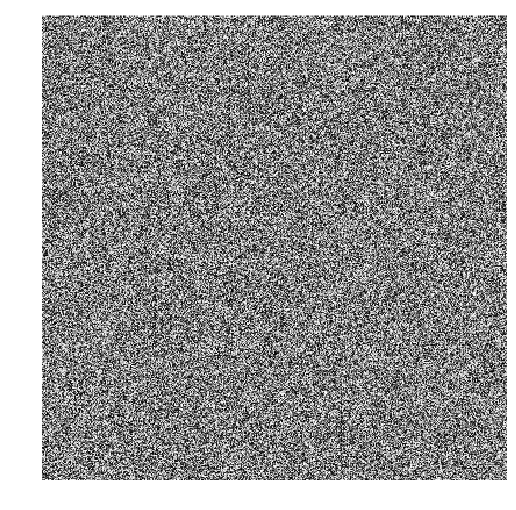

In [63]:
showimage(image)

It looks good already! We can't see any recurrence, but we see a regularity, with small squares.

And it does not seem to depend too much on the seed:

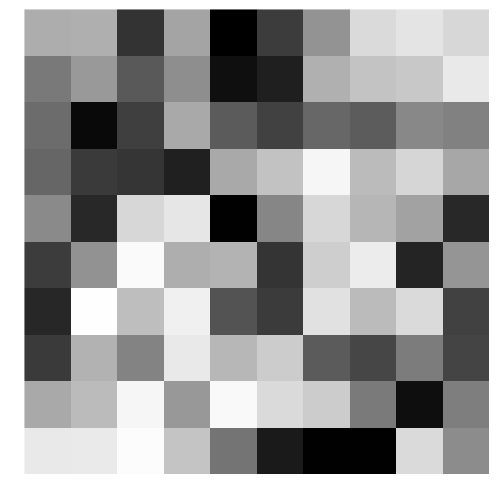

In [64]:
SecondExample.seed(11032017)
image = SecondExample.float_samples((10, 10))
showimage(image)

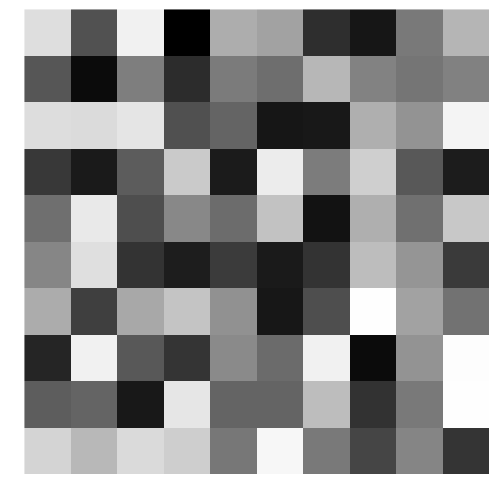

In [65]:
SecondExample.seed(1103201799)
image = SecondExample.float_samples((10, 10))
showimage(image)

We can also visualize the generated numbers with a histogram, to visually check that the random numbers in $[0, 1)$ are indeed "uniformly" located.

In [171]:
def plotHistogram(example, nb=100000, bins=200):
    numbers = example.float_samples((nb,))
    plt.figure(figsize=(14, 3))
    plt.hist(numbers, bins=bins, normed=True, alpha=0.8)
    plt.xlabel("Random numbers in $[0, 1)$")
    plt.ylabel("Mass repartition")
    plt.title("Repartition of ${}$ random numbers in $[0, 1)$".format(nb))
    plt.show()

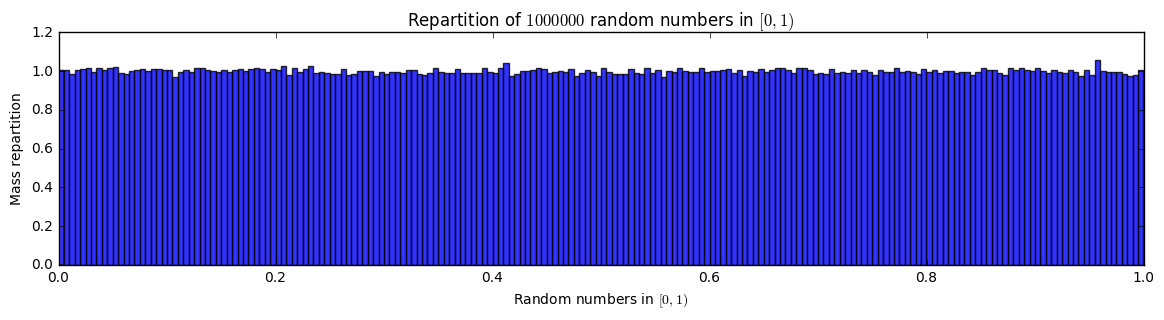

In [172]:
plotHistogram(SecondExample, 1000000, 200)

----
## A second example: Multiple-Recursive Generator
Let start by writing a generic Multiple Recursive Generator, which is defined by the following linear recurrence equation, of order $k \geq 1$:

- Start from $X_0$, with a false initial history of $(X_{-k+1}, X_{-k}, \dots, X_{-1})$,
- And then follow the recurrence equation: $$ X_{t} = (a_1 X_{t-1} + \dots + a_k X_{t-k}) \mod m. $$

This algorithm produces a sequence $(X_t)_{t\in\mathbb{N}} \in \mathbb{N}^{\mathbb{N}}$.

In [66]:
class MultipleRecursiveGenerator(PRNG):
    """A Multiple Recursive Pseudo-Random Number Generator (MRG), with one sequence (X_t)."""
    def __init__(self, m, a, X0):
        """Create a new PRNG with seed X0."""
        assert np.shape(a) == np.shape(X0), "Error: the weight vector a must have the same shape as X0."
        super(MultipleRecursiveGenerator, self).__init__(X0=X0)
        self.m = self.max = m
        self.a = a
    
    def __next__(self):
        """Produce a next value and return it, following the recurrence equation: X_t = (a_1 X_{t-1} + ... + a_k X_{t-k}) mod m."""
        self.t += 1
        x = self.X[0]
        nextx = (np.dot(self.a, self.X)) % self.m
        self.X[1:] = self.X[:-1]
        self.X[0] = nextx
        return x

For example, with an arbitrary choice of $k = 3$, of weights $a = [10, 9, 8]$ and $X_0 = [10, 20, 30]$:

In [69]:
m = (1 << 31) - 1
X0 = np.array([10, 20, 30])
a = np.array([10, 9, 8])

ThirdExample = MultipleRecursiveGenerator(m, a, X0)

test(ThirdExample)

  0th value for MultipleRecursiveGenerator is X_t =         10
  1th value for MultipleRecursiveGenerator is X_t =        520
  2th value for MultipleRecursiveGenerator is X_t =       5450


We can again check for the mean and the variance of the generated sequence:

In [70]:
shape = (400, 400)
image = ThirdExample.float_samples(shape)
np.mean(image), np.var(image)

(0.49978538707846892, 0.08323292202789713)

This Multiple Recursive Generator is of course slower than the simple Linear Recurrent Generator:

In [71]:
%timeit SecondExample.float_samples(shape)
%timeit ThirdExample.float_samples(shape)

1 loop, best of 3: 479 ms per loop
1 loop, best of 3: 3.27 s per loop


And it seems to work fine as well:

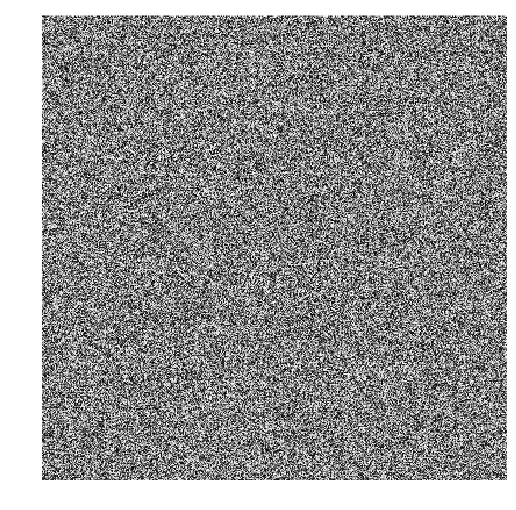

In [72]:
showimage(image)

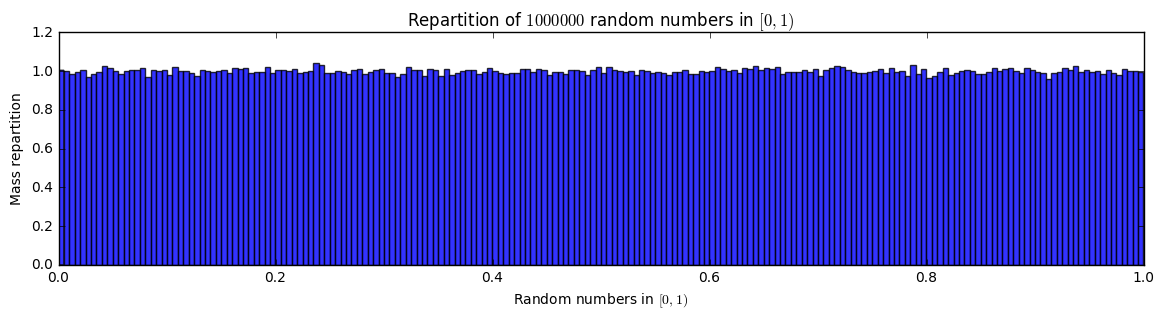

In [173]:
plotHistogram(ThirdExample, 1000000, 200)

> It looks also good!

----
## A third example: combined Multiple-Recursive Generator, with `MRG32k3a`

Let start by writing a generic Multiple Recursive Generator, which is defined by the following coupled linear recurrence equation, of orders $k_1, k_2 \geq 1$:

- Start from $X_0$ and $Y_0$, with a false initial history of $(X_{-k_1 + 1}, X_{-k_1}, \dots, X_{-1})$ and $(Y_{-k_2 + 1}, Y_{-k_2}, \dots, Y_{-1})$,
- And then follow the recurrence equation: $$ X_{t} = (a_1 X_{t-1} + \dots + a_{k_1} X_{t-k_1}) \mod m. $$ and $$ Y_{t} = (b_1 Y_{t-1} + \dots + b_{k_2} Y_{t-k_2}) \mod m. $$

This algorithm produces two sequences $(X_t)_{t\in\mathbb{N}} \in \mathbb{N}^{\mathbb{N}}$ and $(X_t)_{t\in\mathbb{N}} \in \mathbb{N}^{\mathbb{N}}$, and usually the sequence used for the output is $U_t = X_t - Y_t + \max(m_1, m_2)$.

In [74]:
class CombinedMultipleRecursiveGenerator(PRNG):
    """A Multiple Recursive Pseudo-Random Number Generator (MRG), with two sequences (X_t, Y_t)."""
    def __init__(self, m1, a, X0, m2, b, Y0):
        """Create a new PRNG with seeds X0, Y0."""
        assert np.shape(a) == np.shape(X0), "Error: the weight vector a must have the same shape as X0."
        assert np.shape(b) == np.shape(Y0), "Error: the weight vector b must have the same shape as Y0."
        self.t = 0
        # For X
        self.m1 = m1
        self.a = a
        self.X0 = self.X = X0
        # For Y
        self.m2 = m2
        self.b = b
        self.Y0 = self.Y = Y0
        # Maximum integer number produced is max(m1, m2)
        self.m = self.max = max(m1, m2)
    
    def __next__(self):
        """Produce a next value and return it, following the recurrence equation: X_t = (a_1 X_{t-1} + ... + a_k X_{t-k}) mod m."""
        self.t += 1
        # For X
        x = self.X[0]
        nextx = (np.dot(self.a, self.X)) % self.m1
        self.X[1:] = self.X[:-1]
        self.X[0] = nextx
        # For Y
        y = self.Y[0]
        nexty = (np.dot(self.b, self.Y)) % self.m2
        self.Y[1:] = self.Y[:-1]
        self.Y[0] = nexty
        # Combine them
        u = x - y + (self.m1 if x <= y else 0)
        return u

To obtain the well-known `MRG32k3a` generator, designed by L'Ecuyer in 1999, we chose these parameters:

In [76]:
m1 = (1 << 32) - 209                  # important choice!
a = np.array([0, 1403580, -810728])   # important choice!
X0 = np.array([1000, 10000, 100000])  # arbitrary choice!

m2 = (1 << 32) - 22853                # important choice!
b = np.array([527612, 0, -1370589])   # important choice!
Y0 = np.array([5000, 50000, 500000])  # arbitrary choice!

MRG32k3a = CombinedMultipleRecursiveGenerator(m1, a, X0, m2, b, Y0)

test(MRG32k3a)

  0th value for CombinedMultipleRecursiveGenerator is X_t = 4294963087
  1th value for CombinedMultipleRecursiveGenerator is X_t = 1442746955
  2th value for CombinedMultipleRecursiveGenerator is X_t =  970596549


We can again check for the mean and the variance of the generated sequence:

In [77]:
shape = (400, 400)
image = MRG32k3a.float_samples(shape)
np.mean(image), np.var(image)

(0.50116948407748341, 0.083189188379866608)

This combined Multiple Recursive Generator is of course slower than the simple Multiple Recursive Generator and the simple Linear Recurrent Generator:

In [78]:
%timeit SecondExample.float_samples(shape)
%timeit ThirdExample.float_samples(shape)
%timeit MRG32k3a.float_samples(shape)

1 loop, best of 3: 557 ms per loop
1 loop, best of 3: 3.32 s per loop
1 loop, best of 3: 4.2 s per loop


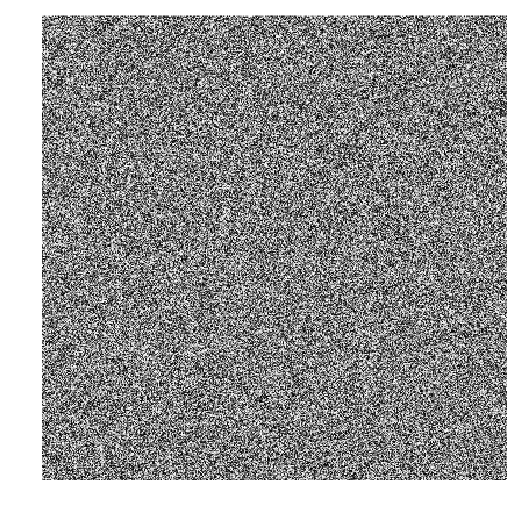

In [80]:
showimage(image)

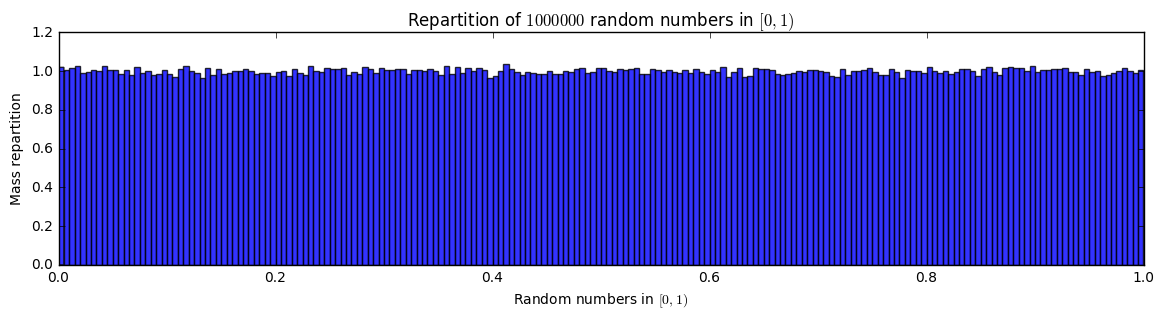

In [174]:
plotHistogram(MRG32k3a, 1000000, 200)

> This one looks fine too!

----
## Finally, the Mersenne twister PRNG

I won't explain all the details, and will follow closely the notations from my reference book [Rubinstein & Kroese, 2017].
It will be harder to implement!

First, let us compute the period of the PRNG we will implement, with the default values for the parameters $w = 32$ (word length) and $n = 624$ ("big" integer).

### Period

In [140]:
w = 32
n = 624

In [141]:
def MersenneTwisterPeriod(n, w):
    return (1 << (w * (n - 1) + 1)) - 1

MersenneTwisterPeriod(n, w) == (2 ** 19937) - 1

True

### Random seeds
Then we need to use a previously defined PRNG to set the random seeds.

To try to have "really random" seeds, let me use that classical trick of using the system time as a source of initial randomness.

- Namely, I will use the number of microseconds in the current time stamp as the seed for a `LinearCongruentialGenerator`,
- Then use it to generate the seeds for a `MRG32k3a` generator,
- And finally use it to get the seed for the Mersenne twister.

In [239]:
from datetime import datetime

def get_seconds():
    d = datetime.today().timestamp()
    s = 1e6 * (d - int(d))
    return int(s)

In [241]:
get_seconds()  # Example

917149

In [242]:
def seed_rows(example, n, w):
    return example.int_samples((n,))

def random_Mersenne_seed(n, w):
    linear = LinearCongruentialGenerator(m=(1 << 31) - 1, a=7 ** 4, c=0, X0=get_seconds())
    assert w == 32, "Error: only w = 32 was implemented"
    m1 = (1 << 32) - 209                  # important choice!
    a = np.array([0, 1403580, -810728])   # important choice!
    X0 = np.array(linear.int_samples((3,)))  # random choice!
    m2 = (1 << 32) - 22853                # important choice!
    b = np.array([527612, 0, -1370589])   # important choice!
    Y0 = np.array(linear.int_samples((3,)))  # random choice!
    MRG32k3a = CombinedMultipleRecursiveGenerator(m1, a, X0, m2, b, Y0)
    seed = seed_rows(MRG32k3a, n, w)
    assert np.shape(seed) == (n,)
    return seed

example_seed = random_Mersenne_seed(n, w)
example_seed

array([ 500071069, 1245846883,  373668495, 3761007176, 2417931555,
       1568720933,  770206282, 4259444896,  610354771, 2347391078,
       1704445137, 3025845358, 1922725669, 2498298905,  311616985,
        505803937, 2111903852, 3943861423, 3756923814, 2865437648,
       3970007335,   10213259, 3870641719, 2947338559, 3071425431,
        708763335, 4112288620, 3214803175, 3863028681, 2661180940,
       1307419115, 1530573517, 3731527995, 2295292068, 4291471456,
        861482309,  527922763, 2078749872, 1614763588, 3314243274,
        153554163, 1021482388,  744601530, 3173473510, 3230695878,
       3174417941, 3862088225, 1257645938, 4098006424,  774956408,
       1040565534, 4293949236, 3173839628, 2595411735, 2569565102,
       1855558451, 1891919093, 2553906025, 2427248493, 1748025401,
       1968534588, 3117076099, 2566016509, 3159433715,  799708423,
       2331550479, 2408505753, 1167011953, 2804042327, 2617707086,
       1791492055, 2998286082, 1424837410, 4178270157, 2678045

In [243]:
for xi in example_seed:
    print("Integer xi = {:>12} and in binary, bin(xi) = {:>34}".format(xi, bin(xi)))

Integer xi =    500071069 and in binary, bin(xi) =    0b11101110011100111101010011101
Integer xi =   1245846883 and in binary, bin(xi) =  0b1001010010000100001110101100011
Integer xi =    373668495 and in binary, bin(xi) =    0b10110010001011011101010001111
Integer xi =   3761007176 and in binary, bin(xi) = 0b11100000001011000110101001001000
Integer xi =   2417931555 and in binary, bin(xi) = 0b10010000000111101011010100100011
Integer xi =   1568720933 and in binary, bin(xi) =  0b1011101100000001100100000100101
Integer xi =    770206282 and in binary, bin(xi) =   0b101101111010000110101001001010
Integer xi =   4259444896 and in binary, bin(xi) = 0b11111101111000011111100010100000
Integer xi =    610354771 and in binary, bin(xi) =   0b100100011000010100011001010011
Integer xi =   2347391078 and in binary, bin(xi) = 0b10001011111010100101100001100110
Integer xi =   1704445137 and in binary, bin(xi) =  0b1100101100101111100010011010001
Integer xi =   3025845358 and in binary, bin(xi) = 0b1

### Implementing the Mersenne twister algorithm
Finally, the Mersenne twister can be implemented like this:

In [244]:
class MersenneTwister(PRNG):
    """The Mersenne twister Pseudo-Random Number Generator (MRG)."""
    def __init__(self, seed=None,
                 w=32, n=624, m=397, r=31,
                 a=0x9908B0DF, b=0x9D2C5680, c=0xEFC60000,
                 u=11, s=7, v=15, l=18):
        """Create a new Mersenne twister PRNG with this seed."""
        self.t = 0
        # Parameters
        self.w = w
        self.n = n
        self.m = m
        self.r = r
        self.a = a
        self.b = b
        self.c = c
        self.u = u
        self.s = s
        self.v = v
        self.l = l
        # For X
        if seed is None:
            seed = random_Mersenne_seed(n, w)
        self.X0 = seed
        self.X = np.copy(seed)
        # Maximum integer number produced is 2**w - 1
        self.max = (1 << w) - 1
        
    def __next__(self):
        """Produce a next value and return it, following the Mersenne twister algorithm."""
        self.t += 1
        # 1. --- Compute x_{t+n}
        # 1.1.a. First r bits of x_t : left = (x_t >> (w - r)) << (w - r)
        # 1.1.b. Last w - r bits of x_{t+1} : right = x & ((1 << (w - r)) - 1)
        # 1.1.c. Concatenate them together in a binary vector x : x = left + right
        left = self.X[0] >> (self.w - self.r)
        right = (self.X[1] & ((1 << (self.w - self.r)) - 1))
        x = (left << (self.w - self.r)) + right
        xw = x % 2             # 1.2. get xw
        if xw == 0:
            xtilde = (x >> 1)            # if xw = 0, xtilde = (x >> 1)
        else:
            xtilde = (x >> 1) ^ self.a   # if xw = 1, xtilde = (x >> 1) ⊕ a
        nextx = self.X[self.m] ^ xtilde  # 1.3. x_{t+n} = x_{t+m} ⊕ \tilde{x}
        # 2. --- Shift the content of the n rows
        oldx0 = self.X[0]          # 2.a. First, forget x0
        self.X[:-1] = self.X[1:]   # 2.b. shift one index on the left, x1..xn-1 to x0..xn-2
        self.X[-1]  = nextx        # 2.c. write new xn-1
        # 3. --- Then use it to compute the answer, y
        y = nextx                      # 3.a. y = x_{t+n}
        y ^= (y >> self.u)             # 3.b. y = y ⊕ (y >> u)
        y ^= ((y << self.s) & self.b)  # 3.c. y = y ⊕ ((y << s) & b)
        y ^= ((y << self.v) & self.c)  # 3.d. y = y ⊕ ((y << v) & c)
        y ^= (y >> self.l)             # 3.e. y = y ⊕ (y >> l)
        return y

### Small review of bitwise operations

The Python documentation explains how to [use bitwise operations easily](https://docs.python.org/3/library/stdtypes.html?highlight=bitwise#bitwise-operations-on-integer-types), and also [this page](https://wiki.python.org/moin/BitwiseOperators) and [this StackOverflow answer](http://stackoverflow.com/a/1746642/).

The only difficult part of the algorithm is the first step, when we need to take the first $r$ bits of $X_t =$ `X[0]`, and the last $w - r$ bits of $X_{t+1} =$ `X[1]`.
On some small examples, let quickly check that I implemented this correctly:

In [204]:
def testsplit(x, r=None, w=None):
    if w is None:
        w = x.bit_length()
    if r is None:
        r = w - 1
    assert x.bit_length() == w
    left = x >> (w - r)
    right = x % 2 if w == 1 else x & ((1 << (w-r) - 1))
    x2 = (left << (w - r)) + right
    assert x == x2
    print("x = {:10} -> left r={} = {:10} and right w-r={} = {:4} -> x2 = {:10}".format(bin(x), r, bin(left), w-r, bin(right), bin(x2)))

x = 0b10011010
testsplit(x)
x = 0b10010011
testsplit(x)
x = 0b10011111
testsplit(x)
x = 0b11110001
testsplit(x)
x = 0b00110001
testsplit(x)

x = 0b10011010 -> left r=7 = 0b1001101  and right w-r=1 = 0b0  -> x2 = 0b10011010
x = 0b10010011 -> left r=7 = 0b1001001  and right w-r=1 = 0b1  -> x2 = 0b10010011
x = 0b10011111 -> left r=7 = 0b1001111  and right w-r=1 = 0b1  -> x2 = 0b10011111
x = 0b11110001 -> left r=7 = 0b1111000  and right w-r=1 = 0b1  -> x2 = 0b11110001
x = 0b110001   -> left r=5 = 0b11000    and right w-r=1 = 0b1  -> x2 = 0b110001  


### Testing our implementation

In [247]:
ForthExample = MersenneTwister()

In [248]:
ForthExample.int_samples((10,))

array([ 459552000,  912043313, 2525278984, 1215821257, 1227947560,
        977225854, 3226546263, 3862935325,  579734992,  703250908])

We can again check for the mean and the variance of the generated sequence:

In [249]:
shape = (400, 400)
image = ForthExample.float_samples(shape)
np.mean(image), np.var(image)

(0.49970197881516359, 0.083003595170557679)

This Python hand-written Mersenne twister is of course slower than the previous PRNG defined above (combined Multiple Recursive Generator, simple Multiple Recursive Generator, and the simple Linear Recurrent Generator):

In [250]:
%timeit SecondExample.float_samples(shape)
%timeit ThirdExample.float_samples(shape)
%timeit MRG32k3a.float_samples(shape)
%timeit ForthExample.float_samples(shape)

1 loop, best of 3: 460 ms per loop
1 loop, best of 3: 3.44 s per loop
1 loop, best of 3: 5.37 s per loop
1 loop, best of 3: 4.25 s per loop


A good surprise is that this implementation Mersenne appears faster than the combined MRG of order $k = 3$ (i.e., `MRG32k3a`).

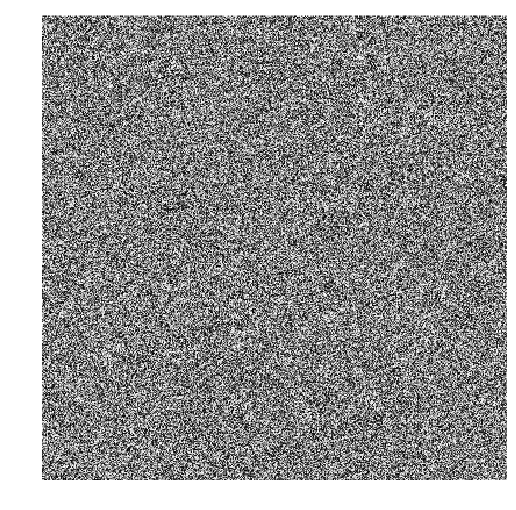

In [251]:
showimage(image)

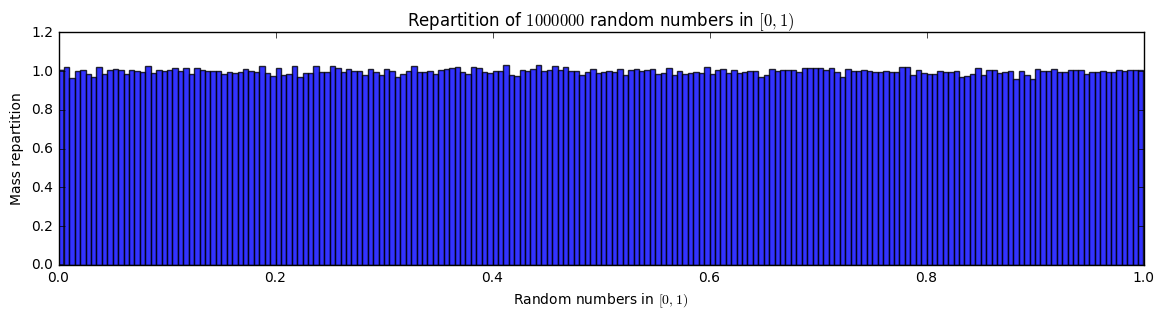

In [252]:
plotHistogram(ForthExample, 1000000, 200)

----
## Conclusion
Well, that's it, I just wanted to implement a few Pseudo-Random Number Generators, and compare them.

I should finish the job:
- implement a test for "randomness", and check the various PRNG I implemented against it,
- use these various `rand()` functions (uniform in $[0,1)$) to generate other distributions.

----
# Generating samples from other distributions
So far, I implemented some PRNG, which essentially give a function `rand()` to produce float number uniformly sampled from $[0, 1)$.

Let use it to generate samples from other distributions.

In [267]:
def newrand():
    """Create a new random function rand()."""
    mersenne = MersenneTwister()
    rand = mersenne.rand
    return rand

rand = newrand()

In [278]:
def plotHistogramOfDistribution(distr, nb=10000, bins=200):
    numbers = [ distr() for _ in range(nb) ]
    plt.figure(figsize=(14, 3))
    plt.hist(numbers, bins=bins, normed=True, alpha=0.8)
    plt.xlabel("Random numbers from function %s" % distr.__name__)
    plt.ylabel("Mass repartition")
    plt.title("Repartition of ${}$ random numbers".format(nb))
    plt.show()

----
## Bernoulli distribution
It is the simplest example, $X \in \{0, 1\}$, $\mathbb{P}(X = 0) = p$ and $\mathbb{P}(X = 1) = 1 - p$ for some parameter $p \in [0,1]$.

In [268]:
def bernoulli(p=0.5):
    """Get one random sample X ~ Bern(p)."""
    assert 0 <= p <= 1, "Error: the parameter p for a bernoulli distribution has to be in [0, 1]."
    return int(rand() < p)

In [270]:
print([ bernoulli(0.5) for _ in range(20) ])
print([ bernoulli(0.1) for _ in range(20) ])  # lots of 0
print([ bernoulli(0.9) for _ in range(20) ])  # lots of 1

[1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0]
[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1]


We can quickly check that the frequency of $1$ in a large sample of size $n$ will converge to $p$ as $n \to +\infty$:

In [271]:
def delta_p_phat_bernoulli(p, nb=100000):
    samples = [ bernoulli(p) for _ in range(nb) ]
    return np.abs(np.mean(samples) - p)

In [273]:
print(delta_p_phat_bernoulli(0.5))
print(delta_p_phat_bernoulli(0.1))
print(delta_p_phat_bernoulli(0.9))

0.0007
0.00016
0.0006


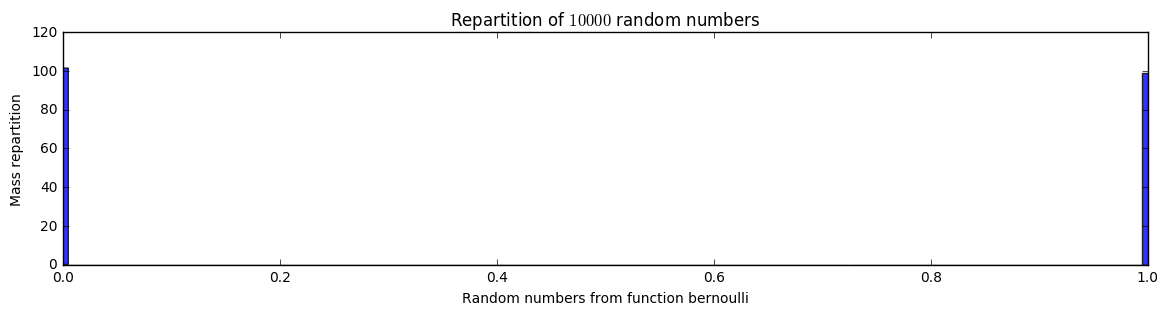

In [279]:
plotHistogramOfDistribution(bernoulli)

----
## Exponential distribution
If $X \sim \mathrm{Exp}(\lambda)$, $F(x) = 1 - \mathrm{e}^{- \lambda x}$, and so $F^{-1}(u) = -\frac1{\lambda} \ln(1 - u)$.
The inversion method is easy to apply here:

In [287]:
from math import log

def exponential(lmbda=1):
    """Get one random sample X ~ Exp(lmbda)."""
    assert lmbda > 0, "Error: the parameter lmbda for exponential(lmbda) must be > 0."
    u = rand()  # 1 - u ~ U([0, 1]), so u and 1 - u follow the same distribution
    return -(1.0 / lmbda) * log(u)

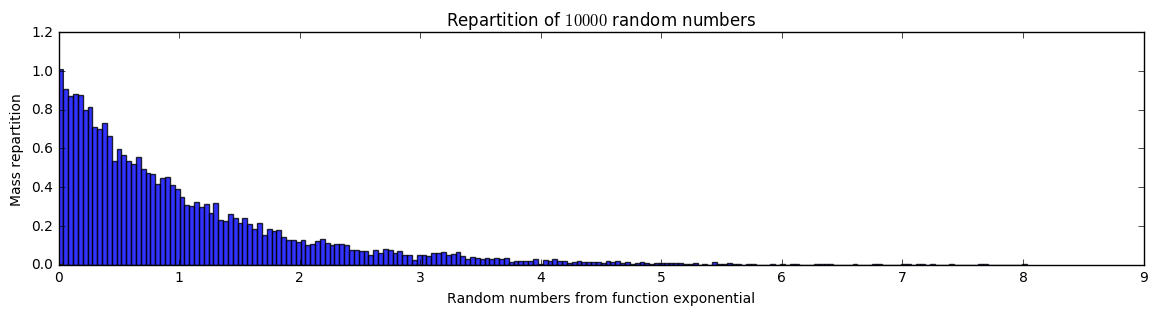

In [283]:
plotHistogramOfDistribution(exponential)

----
## Gaussian distribution (normal)
By using the Box-Muller approach, if $U_1, U_2 \sim U([0, 1])$ are independent, then setting $X = \sqrt{- 2 \ln U_1} \cos(2 \pi U_2)$ and $Y = \sqrt{- 2 \ln U_1} \sin(2 \pi U_2)$ leads to $X, Y \sim N(0, 1).

Then $Z = \mu + \sigma * X$ will be distributed according to the Gaussian distribution of *mean* $\mu$ and *variance* $\sigma > 0$: $Z \sim N(\mu, \sigma)$.

In [288]:
from math import sqrt, cos, pi

def normal(mu=0, sigma=1):
    """Get one random sample X ~ N(mu, sigma)."""
    assert sigma > 0, "Error: the parameter sigma for normal(mu, sigma) must be > 0."
    u1, u2 = rand(), rand()
    x = sqrt(- 2 * log(u1)) * cos(2 * pi * u2)
    return mu + sigma * x

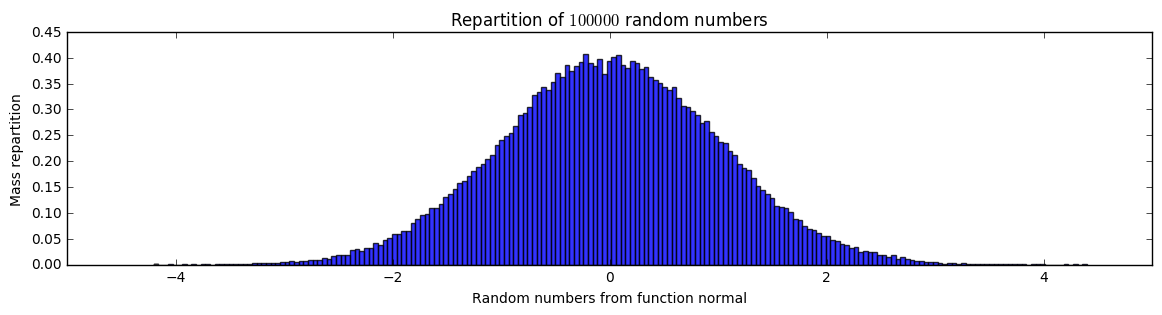

In [286]:
plotHistogramOfDistribution(normal, 100000)

----
## Erlang distribution
If $X \sim \mathrm{Erl}(m, \lambda)$, then it simply is the sum of $m \in \mathbb{N}^{*}$ *iid* exponential random variables $Y_i \sim \mathrm{Exp}(\lambda)$.

In [295]:
def erlang(m=1., lmbda=1.):
    """Get one random sample X ~ Erl(m, lmbda)."""
    assert m > 0, "Error: the parameter m for erlang(m, lmbda) must be > 0."
    assert lmbda > 0, "Error: the parameter lmbda for erlang(m, lmbda) must be > 0."
    return - 1. / lmbda * sum(log(rand()) for _ in range(int(m)) )

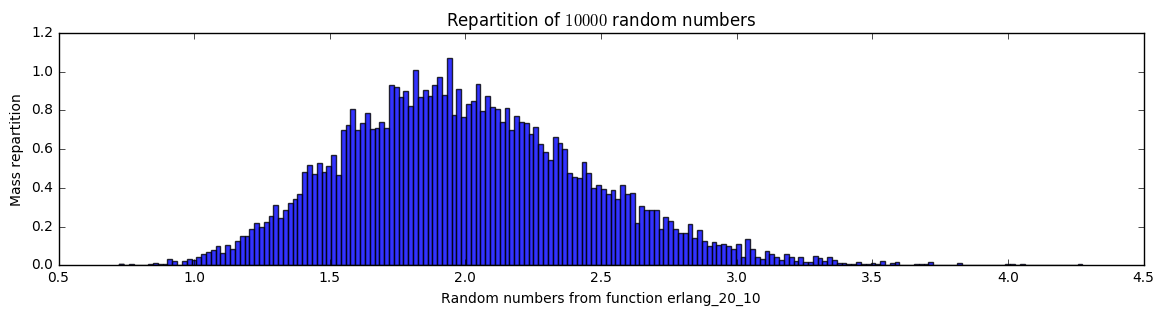

In [302]:
def erlang_20_10():
    return erlang(20, 10)

plotHistogramOfDistribution(erlang_20_10)

----
## Gamma distribution
The algorithm is more complicated.
The pdf of $X \sim \mathrm{Gamma}(\alpha, \lambda)$ is $f(x) = x^{\alpha - 1} \lambda^{\alpha} \mathrm{e}^{- \lambda x} / \Gamma(\alpha)$, for parameters $\alpha>0, \lambda>0$.

In [304]:
def gamma(alpha=1., lmbda=1.):
    """Get one random sample X ~ Gamma(alpha, lmbda)."""
    assert alpha > 0, "Error: the parameter alpha for gamma(alpha, lmbda) must be > 0."
    assert lmbda > 0, "Error: the parameter lmbda for gamma(alpha, lmbda) must be > 0."
    if alpha <= 1:
        x = gamma(alpha + 1., lmbda)
        u = rand()
        return x * (u ** (1. / alpha))
    else:
        d = alpha - (1. / 3.)
        oneByC = sqrt(9. * d)
        c = 1. / oneByC
        while True:
            z = normal(0, 1)
            if z > - oneByC:
                v = (1. + c * z)**3
                u = rand()
                if log(u) < (.5 * (z**2)) + d*(v + log(v)):
                    break
        return d * v / lmbda

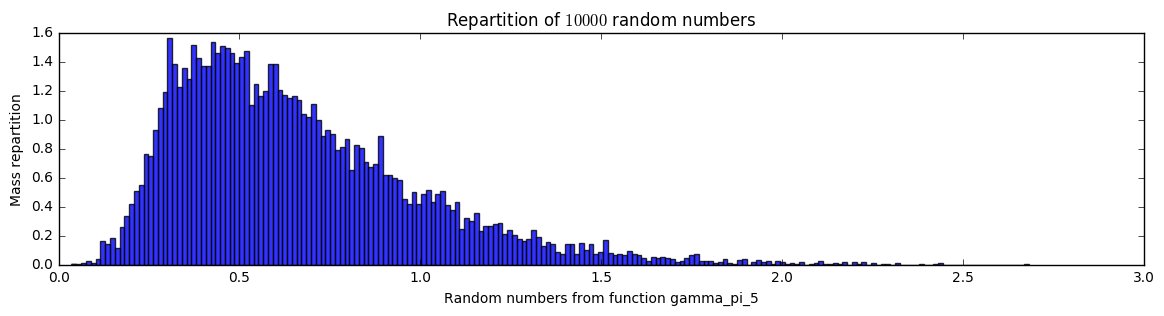

In [305]:
def gamma_pi_5():
    return gamma(pi, 5)

plotHistogramOfDistribution(gamma_pi_5)

----
## Beta distribution
By definition, a Beta distribution is straightforward to obtain as soon as we have a Gamma distribution:
if $Y_1 \sim \mathrm{Gamma}(\alpha, 1)$ and $Y_2 \sim \mathrm{Gamma}(\beta, 1)$, then $X = \frac{Y_1}{Y_1 + Y_2}$ follows $\mathrm{Beta}(\alpha, \beta)$.

In [306]:
def beta(a=1., b=1.):
    """Get one random sample X ~ Beta(a, b)."""
    assert a > 0, "Error: the parameter a for beta(a, b) must be > 0."
    assert b > 0, "Error: the parameter b for beta(a, b) must be > 0."
    y1 = gamma(a, 1.)
    y2 = gamma(b, 1.)
    return y1 / float(y1 + y2)

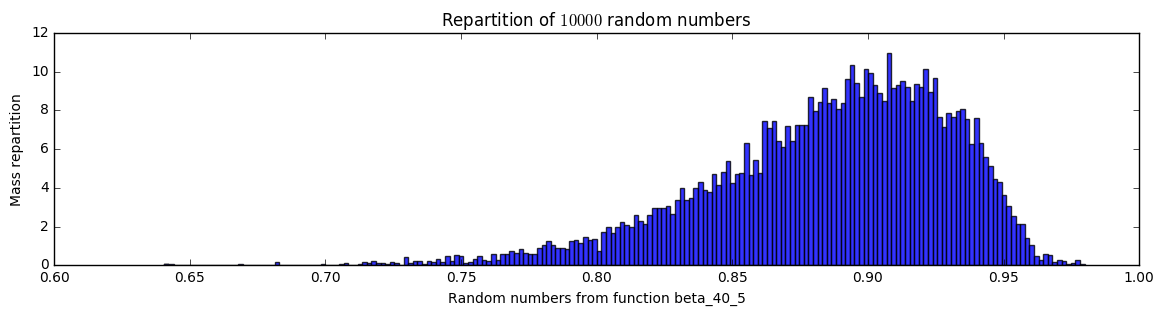

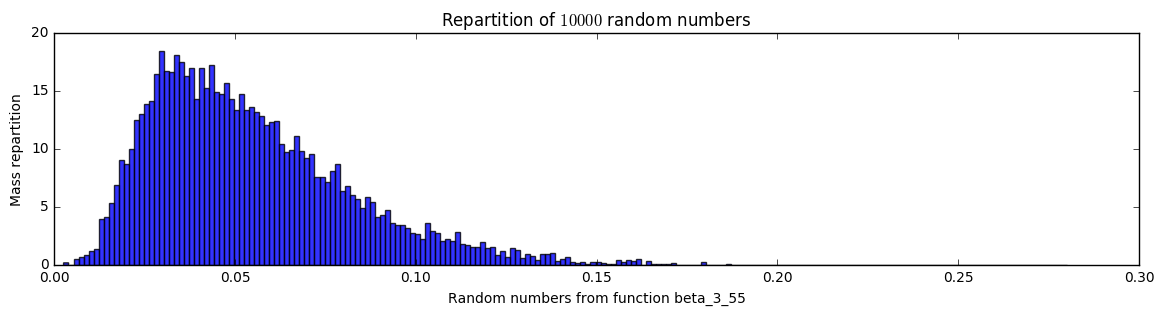

In [308]:
def beta_40_5():
    return beta(40, 5)

plotHistogramOfDistribution(beta_40_5)

def beta_3_55():
    return beta(3, 55)

plotHistogramOfDistribution(beta_3_55)

----
## Integer Beta distribution
If $\alpha = m, \beta = n$ are integer, it is much simpler:

In [311]:
def int_beta(m=1, n=1):
    """Get one random sample X ~ Beta(m, n) with integer parameters m, n."""
    assert m > 0, "Error: the parameter m for int_beta(m, n) must be > 0."
    assert n > 0, "Error: the parameter n for int_beta(m, n) must be > 0."
    us = [rand() for _ in range(m + n - 1)]
    return sorted(us)[m]  # inefficient to sort, but quick to write!

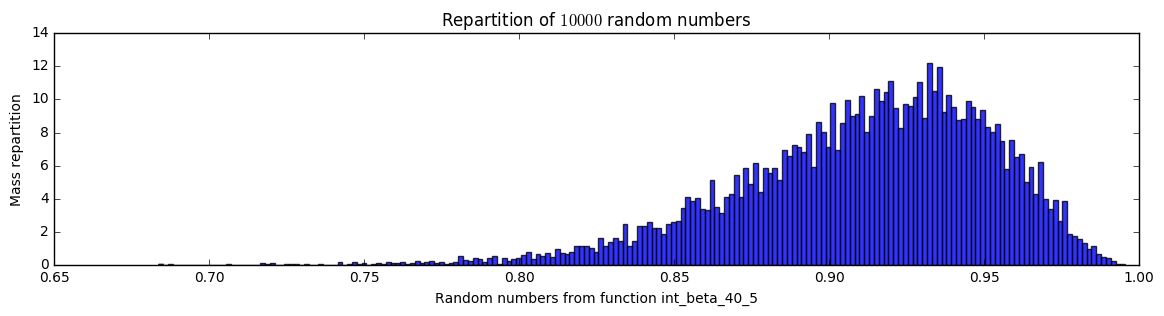

In [312]:
def int_beta_40_5():
    return int_beta(40, 5)

plotHistogramOfDistribution(int_beta_40_5)

----
## Binomial distribution
